In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.animation import FuncAnimation

In [2]:
## Estilo ploteo
rc("font", size=24)
rcParams['figure.figsize'] = 8, 8
COLOR = 'white'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR

In [9]:
# Parameters
filename = "./birds_300_N_400_L_5.000000_movement_d_link.txt"
name_split = filename.split('_')
N, t_f, L = int(name_split[1]), int(name_split[3]), float(name_split[5])
N_steps = 5

In [4]:
def update_arrays(f, x, y, angle):
    line = f.readline()
    i = 0
    while line != "\n" and line != "":
        if line[0] != '#':
            x[i], y[i], angle[i] = (float(s) for s in line.split()[1:])
            i += 1
        line = f.readline()

In [5]:
def update(n):
    ax.set_title(f"t = {n*N_steps}")
    update_arrays(f, x, y, theta)
    q.set_UVC(np.cos(theta), np.sin(theta))
    q.set_offsets(np.c_[x, y])

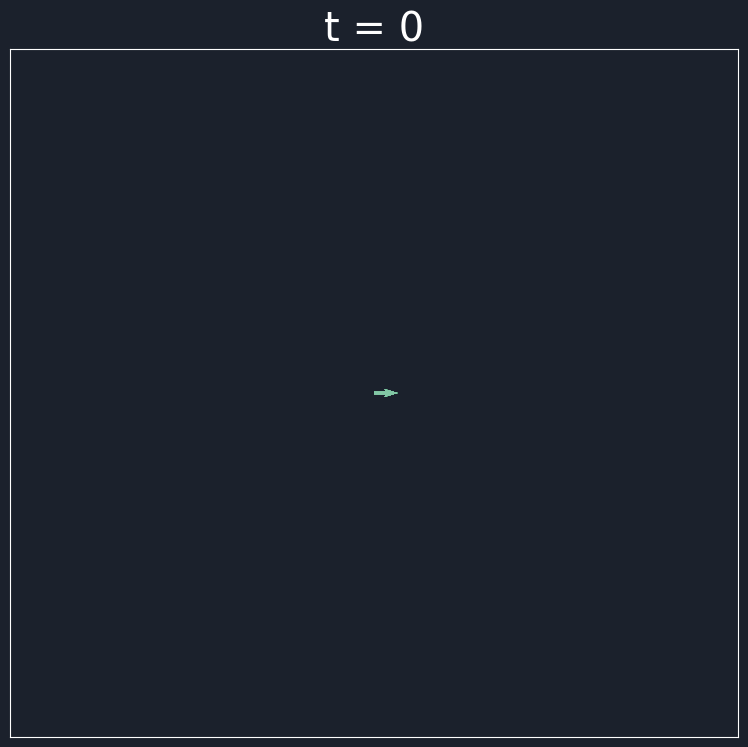

In [10]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)

ax.set_xlim(0, L)
ax.set_ylim(0, L)

ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
                right=False, left=False, labelleft=False)

#fig.patch.set_facecolor('#1b212c')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "#1b212c",
    "figure.edgecolor": "#1b212c",
    "savefig.facecolor": "#1b212c",
    "savefig.edgecolor": "#1b212c"})
ax.set_facecolor('#1b212c')

x, y, theta = .5*L*np.ones(N), .5*L*np.ones(N), np.zeros(N)
f = open(filename, "r")
q = ax.quiver(x, y, np.cos(theta), np.sin(theta), color="#82c7a5")

ax.set_title("t = 0")

plt.show()

In [11]:
anim = FuncAnimation(fig, update, frames=t_f, interval=100)
anim.save("FirstBirds.gif", dpi=80, writer="imagemagick")